In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weather_classification_data.csv')

In [4]:
df.head(15)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [16]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


In [6]:
# periksa nilai yang hilang di setiap kolom
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [13]:
print("Tipe data setelah encoding:")
print(df.dtypes)

Tipe data setelah encoding:
Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int32
Atmospheric Pressure    float64
UV Index                  int64
Season                    int32
Visibility (km)         float64
Location                  int32
Weather Type              int32
dtype: object


In [15]:
df.head(15)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,0
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,2
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,2
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,2
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,3


<Figure size 2000x2000 with 0 Axes>

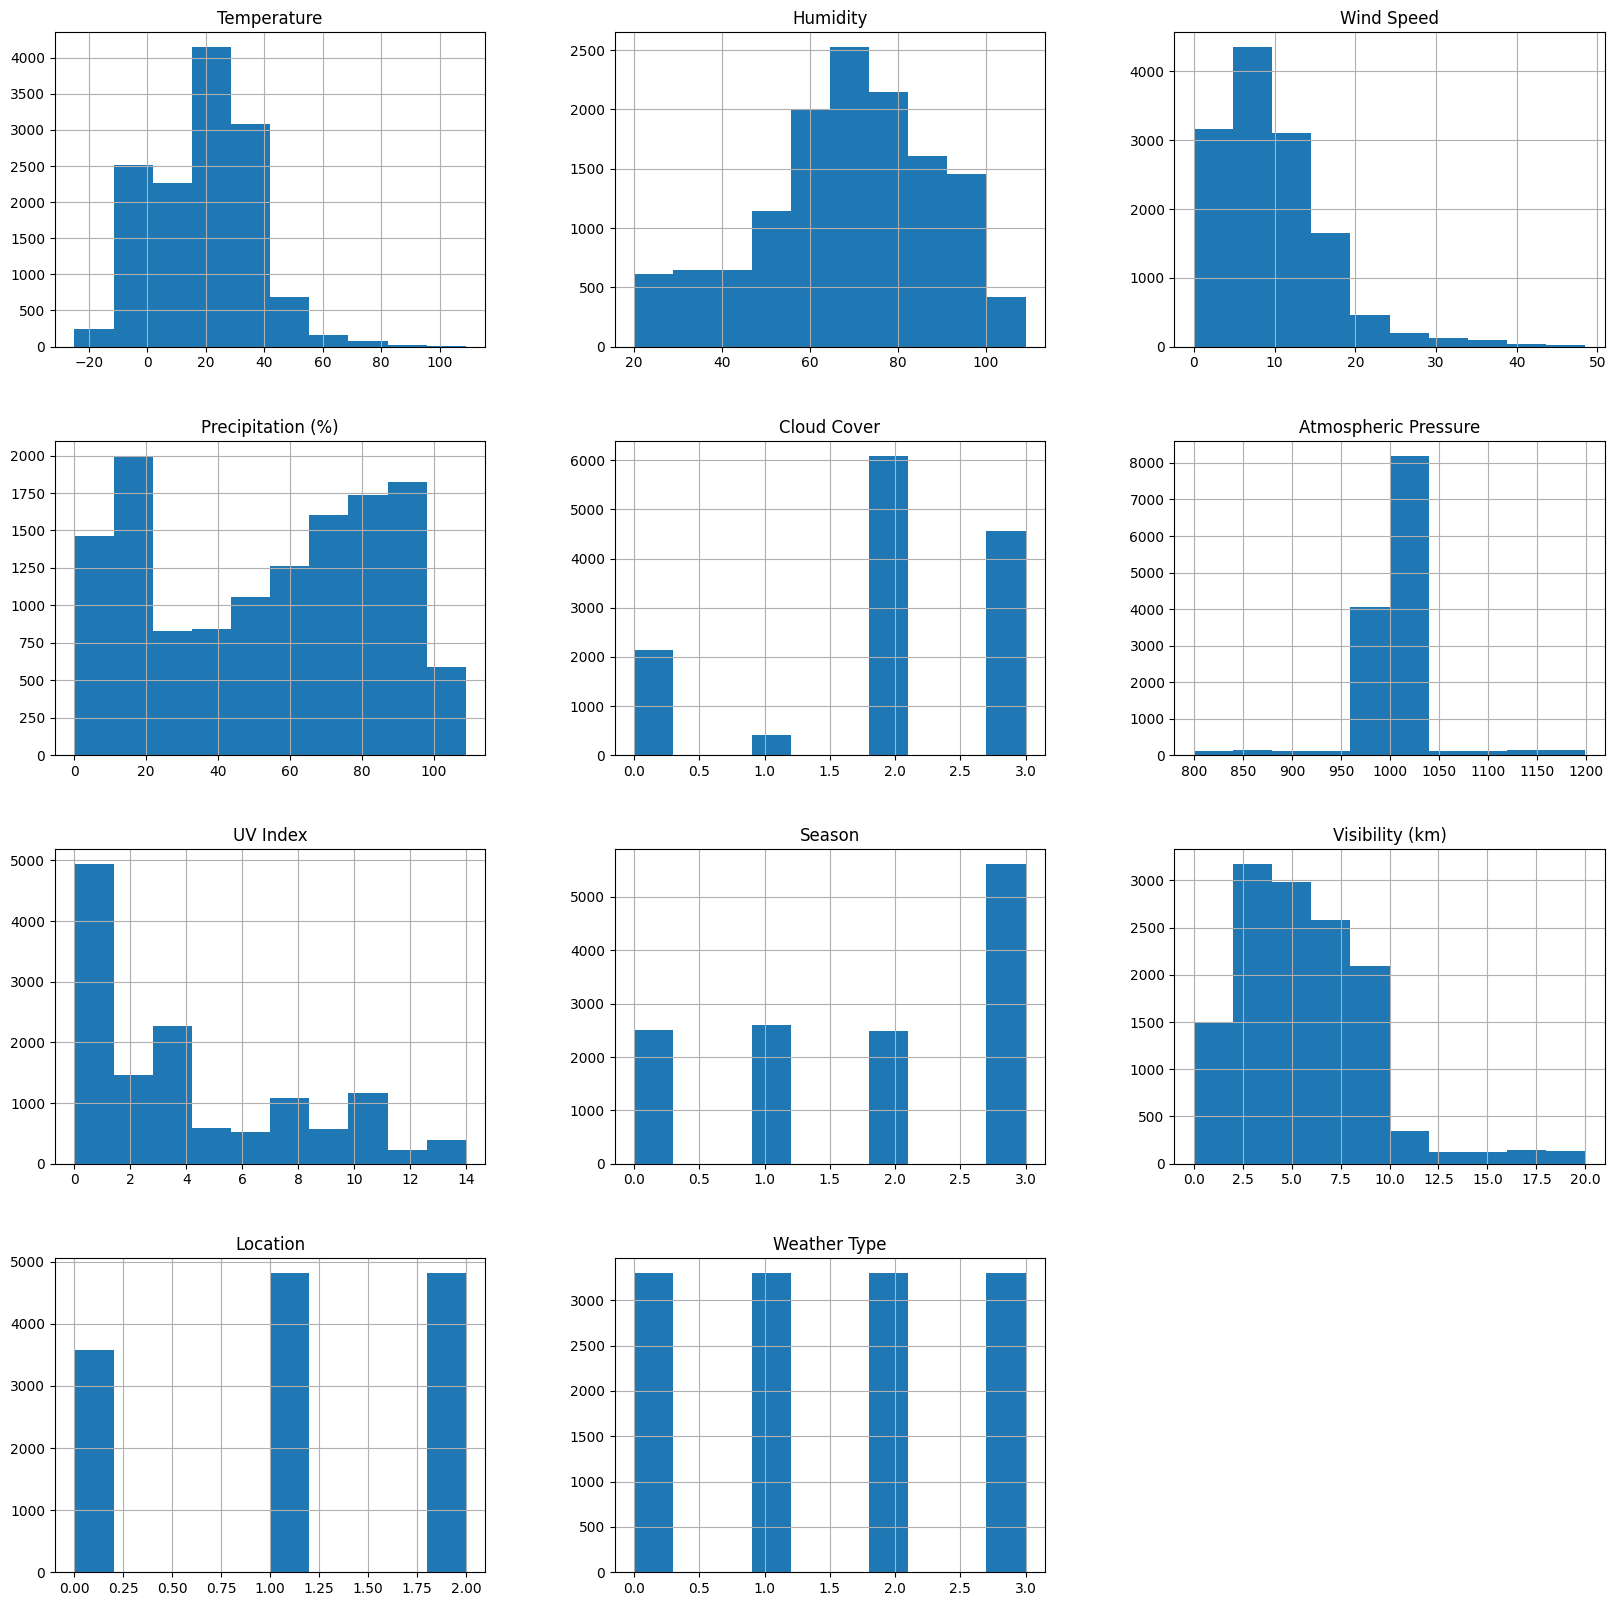

In [17]:
plt.figure(figsize=(20,20))
df.hist(figsize=(20,20))
plt.show()

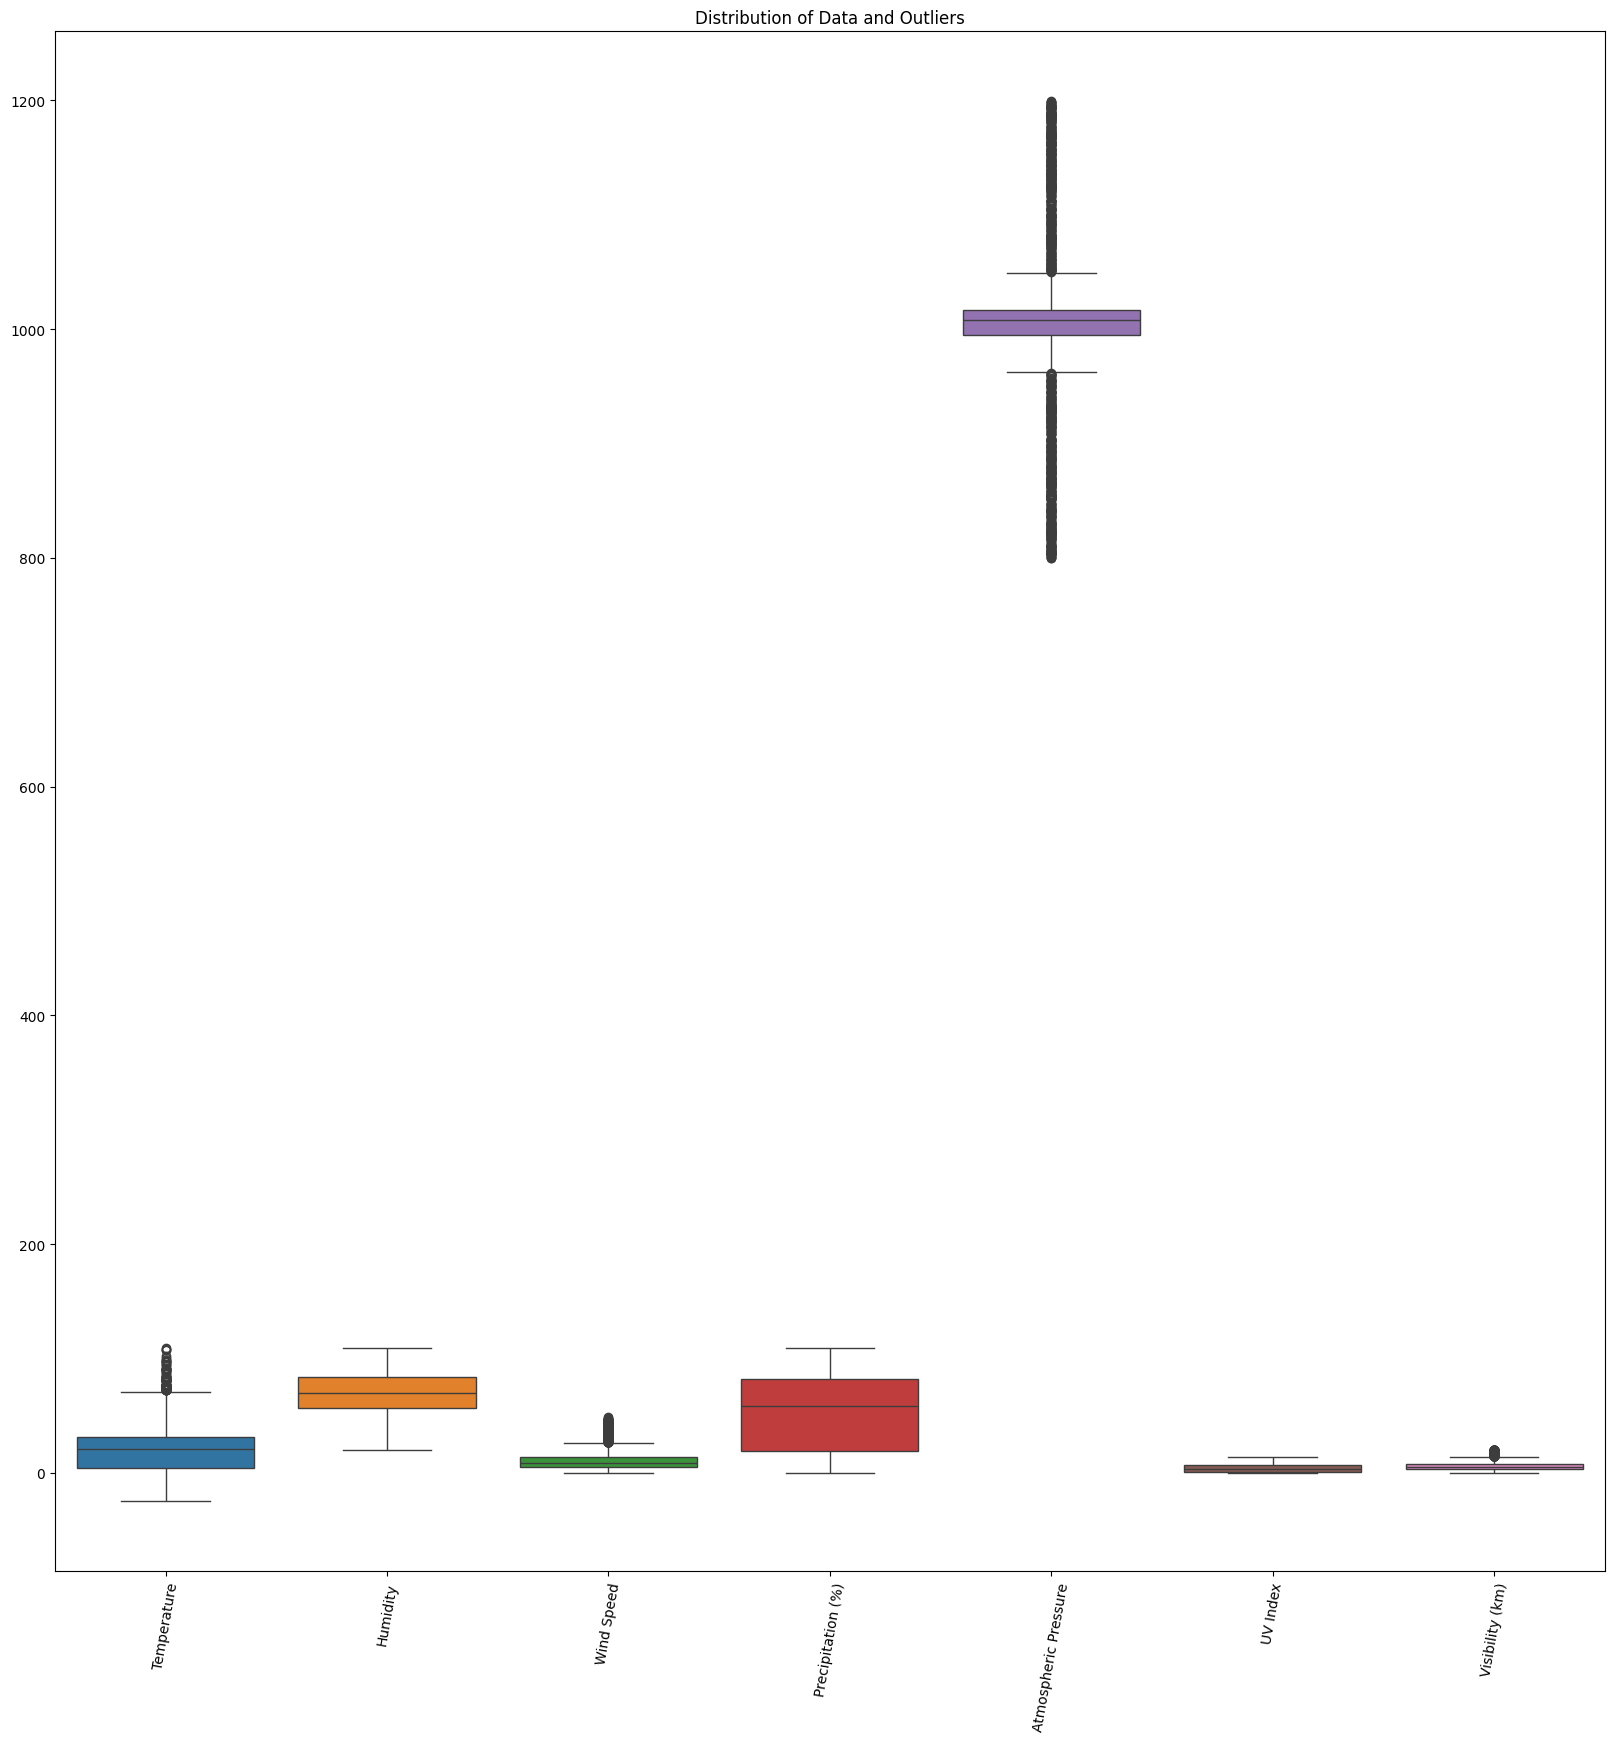

In [18]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Distribution of Data and Outliers')
plt.xticks(rotation=80)
plt.show()

In [20]:
# Memilih fitur dan label
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

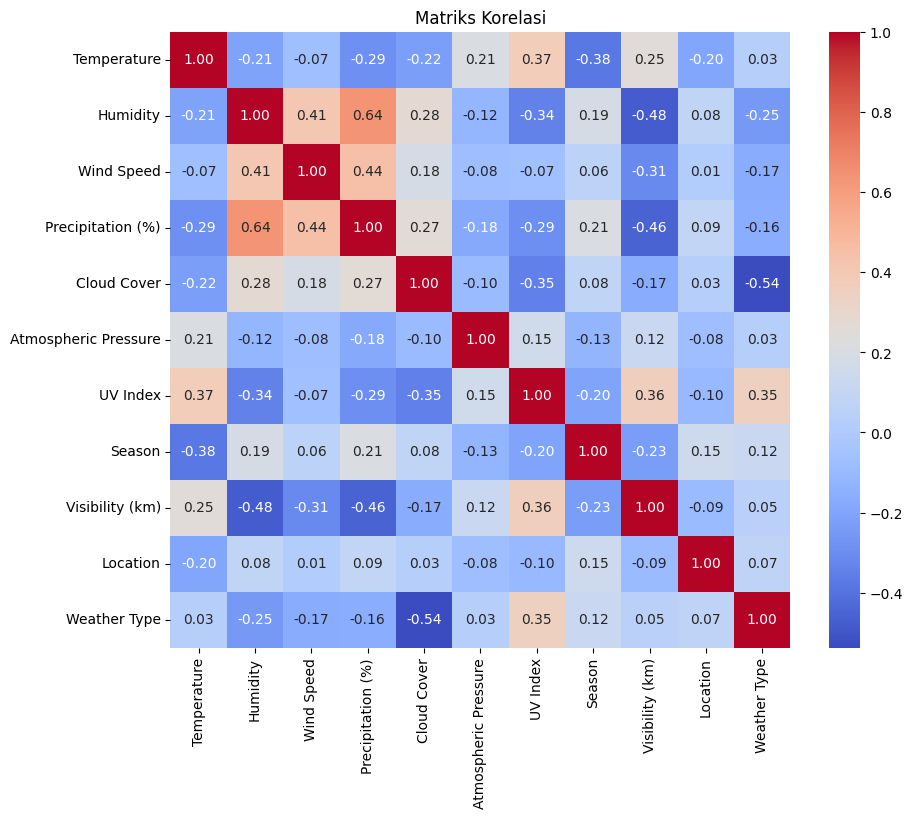

In [22]:
import seaborn as sns

numerical_data = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [23]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Memeriksa bentuk dan tipe data setelah pembagian
print("\nBentuk X_train:", X_train.shape)
print("Tipe data X_train:", X_train.dtype)


Bentuk X_train: (10560, 2)
Tipe data X_train: float64


In [26]:
# Menampilkan hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (10560, 2)
Ukuran X_test: (2640, 2)
Ukuran y_train: (10560,)
Ukuran y_test: (2640,)


In [27]:
# Menampilkan nilai X_train dan y_train
print("\nFitur Pelatihan (X_train):")
print(X_train)
print("\nTarget Pelatihan (y_train):")
print(y_train)


Fitur Pelatihan (X_train):
[[ 6.  92. ]
 [11.  57. ]
 [ 6.5 11. ]
 ...
 [ 7.  13. ]
 [10.  84. ]
 [ 5.5 65. ]]

Target Pelatihan (y_train):
[1 1 3 ... 0 0 1]


In [28]:
# Menampilkan nilai X_test dan y_test
print("\nFitur Pengujian (X_test):")
print(X_test)
print("\nTarget Pengujian (y_test):")
print(y_test)


Fitur Pengujian (X_test):
[[ 4.5  6. ]
 [14.5 83. ]
 [ 2.  12. ]
 ...
 [ 4.  93. ]
 [ 8.  89. ]
 [ 7.5 23. ]]

Target Pengujian (y_test):
[3 3 3 ... 2 2 0]


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
# Menghitung dan menampilkan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print("\nConfusion Matrix:")
print(cm)                                
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Naive Bayes: {accuracy * 100:.2f}%')


Confusion Matrix:
[[235  60  53 303]
 [ 83 384 166  14]
 [ 79 321 280  21]
 [ 27  54  63 497]]
Akurasi Model Naive Bayes: 52.88%


C:\Users\M S I\AppData\Local\Temp\ipykernel_27100\3485825991.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


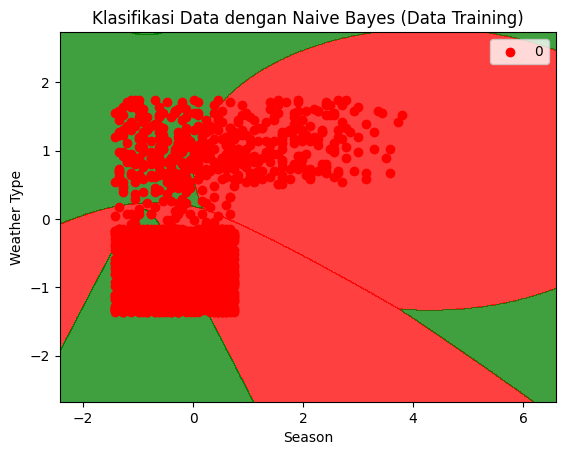

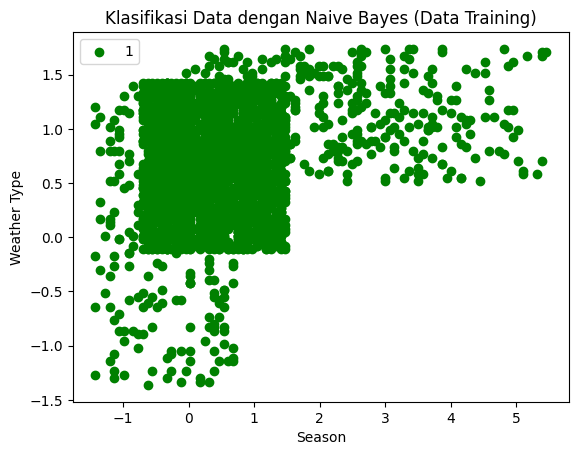

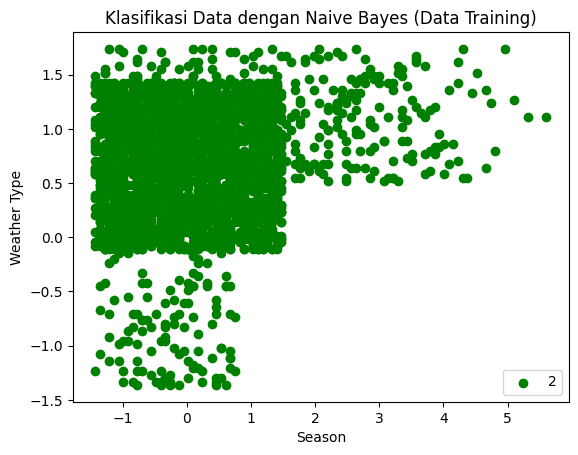

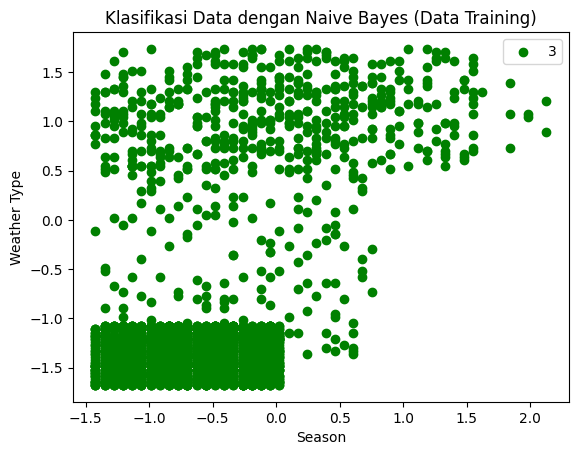

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Season')
    plt.ylabel('Weather Type')
    plt.legend()
    plt.show()

C:\Users\M S I\AppData\Local\Temp\ipykernel_27100\4231345066.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


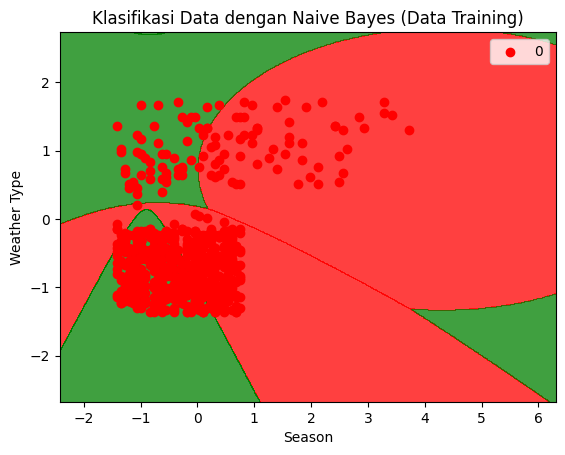

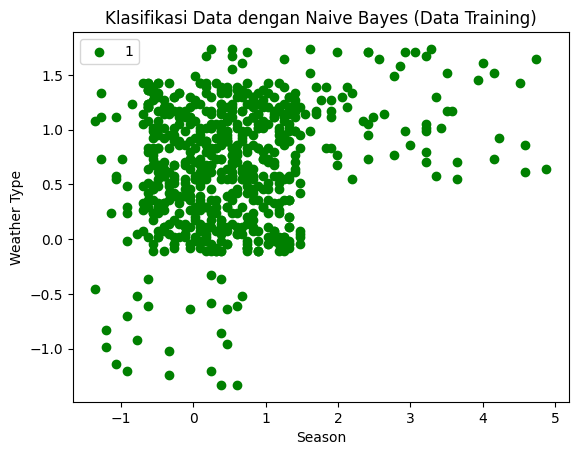

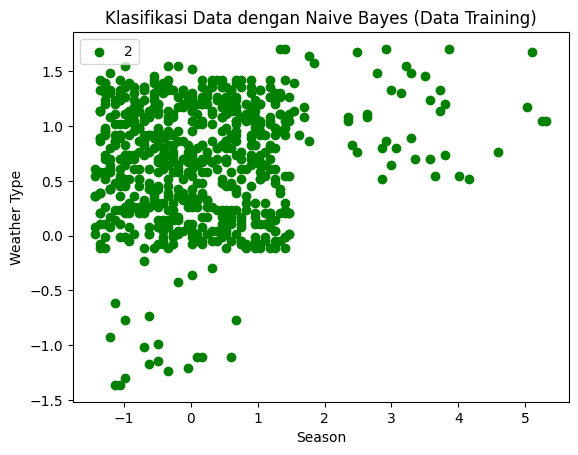

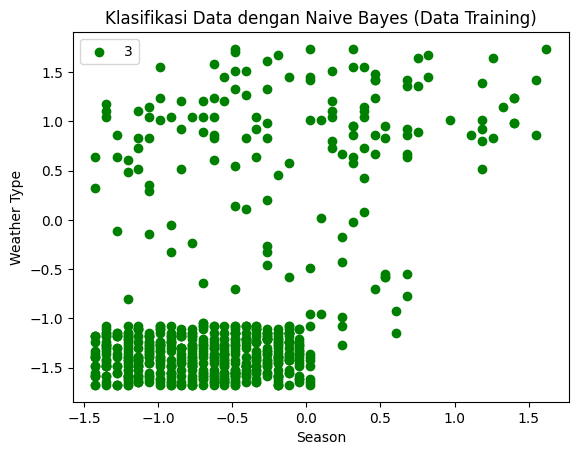

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Season')
    plt.ylabel('Weather Type')
    plt.legend()
    plt.show()